In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns



# Depreicated

***This file was downloaded directly to the laptop.  Since it's available for download, there is no API call made.  You'll have to download this yourself. http://inalitic.com/datasets/nhl%20player%20data.html*** 

In [2]:
df = pd.read_csv('skater_stats.csv', encoding='latin1')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# New API

In [3]:
teamgoalsdict = {}
yeardict = {}
listofgoalgpgBefore = []

# For each year that there was an NHL season 
# for i in range(10):
#     year = 1993+i
#     year2 = year+1
#     if year != 2004:
#         yearhtml = 'https://statsapi.web.nhl.com/api/v1/teams?expand=team.stats&season=' + str(year) + str(year2)
#         r = requests.get(yearhtml, auth=('user', 'pass'))
#         nestdict = r.json()
#         for i in [26, 26, 26, 26, 26, 27, 28, 30, 30, 30]:
#             name = nestdict['teams'][i]['teamStats'][0]['splits'][0]['team']['name']
#             goalsPerGame = nestdict['teams'][i]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
#             listofgoalgpgBefore.append(goalsPerGame)
# 
# 'goalsPerGame'

seasonindices = ['19931994', '19941995', '19951996', '19961997', '19971998', '19981999', '19992000', '20002001', '20012002', '20022003']
# seasonindices = ['19981999', '19992000', '20002001', '20012002', '20022003']

for index in seasonindices:
    print(index)
    yearhtml = 'https://statsapi.web.nhl.com/api/v1/teams?expand=team.stats&season=' + index
    r = requests.get(yearhtml, auth=('user', 'pass'))
    nestdict = r.json()
    for i in range(len(nestdict['teams'])):
        name = nestdict['teams'][i]['teamStats'][0]['splits'][0]['team']['name']
        goalsPerGame = nestdict['teams'][i]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
        listofgoalgpgBefore.append(goalsPerGame)


seasonindicesaft = ['20062007', '20072008', '20082009', '20092010', '20102011', '20112012', '20122013', '20132014', '20142015', '20152016']
# seasonindicesaft = ['20112012', '20122013', '20132014', '20142015', '20152016']
listofgoalgpgAfter = []

for index in seasonindicesaft:
    print(index)
    yearhtml = 'https://statsapi.web.nhl.com/api/v1/teams?expand=team.stats&season=' + index
    r = requests.get(yearhtml, auth=('user', 'pass'))
    nestdict = r.json()
    for i in range(len(nestdict['teams'])):
        name = nestdict['teams'][i]['teamStats'][0]['splits'][0]['team']['name']
        goalsPerGame = nestdict['teams'][i]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
        listofgoalgpgAfter.append(goalsPerGame)        
        

        

19931994
19941995
19951996
19961997
19971998
19981999
19992000
20002001
20012002
20022003
20062007
20072008
20082009
20092010
20102011
20112012
20122013
20132014
20142015
20152016


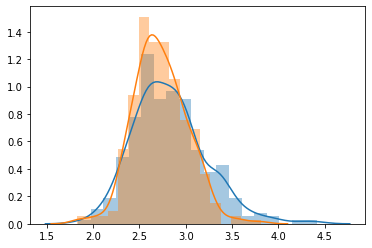

In [4]:
sns.distplot(listofgoalgpgBefore)
sns.distplot(listofgoalgpgAfter)

For relatively normal graphs, the mean should equal the median.  This is just a quick and dirty way of determining normality.  Probably not the best way, but should be good enough.

In [5]:
np.mean(np.array(listofgoalgpgAfter))/np.median(np.array(listofgoalgpgAfter))

1.0070877970693264

Still gonna bootstrap.  But here is a look without bootstrapping.

In [6]:
import scipy.stats as stats
import statsmodels.stats as sm

stats.ttest_ind(listofgoalgpgBefore, listofgoalgpgAfter)

# print(np.average(np.array(listofgoalgpgBefore)), np.average(np.array(listofgoalgpgAfter)))

Ttest_indResult(statistic=3.442300149495998, pvalue=0.000618864598146791)

### Bootstrapping

In [7]:
sampledgpgBefore = []
sampledgpgAfter = []
bootstrap_means_before = []
bootstrap_means_after = []

for iteration in range(500):
    for gpgs in range(10):
        sampledgpgBefore.append(np.random.choice(listofgoalgpgBefore))
        sampledgpgAfter.append(np.random.choice(listofgoalgpgAfter))
    bootstrap_means_before.append(np.average(sampledgpgBefore))
    bootstrap_means_after.append(np.average(sampledgpgAfter))

Text(0.5, 0, 'Goals per game from bootstrapped means')

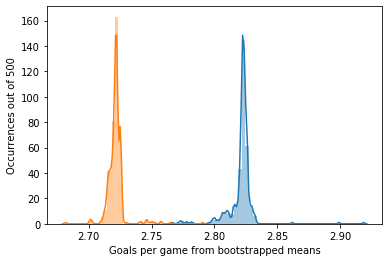

In [62]:
sns.distplot(np.array(bootstrap_means_before))
sns.distplot(np.array(bootstrap_means_after))
plt.ylabel('Occurrences out of 500');
plt.xlabel('Goals per game from bootstrapped means')


In [60]:
bootstrap_means_after

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [9]:
stats.ttest_ind(bootstrap_means_before, bootstrap_means_after)

Ttest_indResult(statistic=178.3024679728784, pvalue=0.0)

Ok so...not the same. Clearly not the same.

# Let's look at ages now

#### H0: There is *not* a statistically significant point decrease in players once they've turned 31.

#### Ha: There is a statistically significant point decrease in players once they've turned 31.

In [11]:
df = df.drop('Unnamed: 0', axis = 1)
d_men = df[df.Pos == " D "].index
df.drop(d_men, inplace=True)

df.head(10)

,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,35,...,-,110,12,"1,241",16:33,40.0,174.0,47.0,50.0,48.5
1,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,...,-,70,6,645,12:10,8.0,24.0,4.0,8.0,33.3
2,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,11,...,-,66,15,775,12:55,41.0,152.0,42.0,51.0,45.2
3,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,1,...,-,11,-,60,12:03,1.0,4.0,0.0,1.0,0.0
4,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,65,...,-,200,15,"1,398",17:55,17.0,65.0,78.0,94.0,45.3
8,2018,Michael Amadio,21.0,LAK,C,37,4,0.1081,4,8,...,-,28,14,345,9:19,9.0,18.0,74.0,96.0,43.5
9,2018,Josh Anderson,23.0,CBJ,RW,63,19,0.3016,11,30,...,-,188,10,"1,136",18:02,24.0,109.0,26.0,36.0,41.9
10,2018,Lias Andersson,19.0,NYR,C,7,1,0.1429,1,2,...,-,5,20,84,11:57,3.0,9.0,19.0,28.0,40.4
12,2018,Andy Andreoff,26.0,LAK,LW,45,3,0.0667,6,9,...,-,47,6,423,9:23,11.0,77.0,24.0,29.0,45.3
13,2018,Sven Andrighetto,24.0,COL,RW,50,8,0.1600,14,22,...,-,111,7,724,14:29,18.0,38.0,7.0,15.0,31.8


In [12]:
df.Pos.unique()

array([' LW ', ' C ', ' RW ', ' RW/LW ', ' LW/RW ', ' RW/C ', ' C/LW ',
       ' LW/C ', ' LW/D ', ' RW/D ', ' C/RW ', ' C/RW/ ', ' D/LW ',
       ' C/LW/ ', ' D/RW ', ' F ', ' W/D ', ' W ', ' C/D '], dtype=object)

In [17]:
players_30 = []
df_30 = df.loc[df.Age == 30.0]
df_31 = df.loc[df.Age == 31.0]
series_30 = df_30.Player
series_31 = df_31.Player
player_dict_30 = {}
player_dict_31 = {}

for key30, value30 in series_30.iteritems():
    if value30 not in player_dict_30.keys():
        if value30.endswith('*'):
            player_dict_30[value30[:-1]] = df.loc[key30, ['PTS', 'GP']]
        else:
            player_dict_30[value30] = df.loc[key30, ['PTS', 'GP']]
            
for key31, value31 in series_31.iteritems():
    if value31 not in player_dict_31.keys():
        if value31.endswith('*'):
            player_dict_31[value31[:-1]] = df.loc[key31, ['PTS', 'GP']]
        else:
            player_dict_31[value31] = df.loc[key31, ['PTS', 'GP']]
            
# player_dict_30
# for key30, value30 in series_30.iteritems():
#     if key30 not in player_dict_30.keys():
#         if item30[1].endswith('*'):
#             player_dict_30[item30[1][:-1]] = df.iloc[item30[0], [9, 5]]
#         else:
#             player_dict_30[item30[1]] = df.iloc[item30[0], [9, 5]]


# for item31 in series_31.iteritems():
#     print(item31)
#     if item31 not in player_dict_31.keys():
#         if item31[1].endswith('*'):
#             player_dict_31[item31[1][:-1]] = df.iloc[item31[0], [9, 5]]
#         else:
#             print(item31[1])
#             player_dict_31[item31[1]] = df.iloc[item31[0], [9, 5]]
    

    


In [18]:
player_dict_31

{'Mike Blunden': PTS     -   
 GP         1
 Name: 67, dtype: object, 'Jared Boll': PTS     1 
 GP      10
 Name: 71, dtype: object, 'Tyler Bozak': PTS     43 
 GP       81
 Name: 87, dtype: object, 'Blake Comeau': PTS     34 
 GP       79
 Name: 152, dtype: object, 'David Desharnais': PTS     28 
 GP       71
 Name: 192, dtype: object, 'Derek Dorsett': PTS     9 
 GP      20
 Name: 202, dtype: object, 'Brandon Dubinsky': PTS     16 
 GP       62
 Name: 208, dtype: object, 'Micheal Haley': PTS     9 
 GP      75
 Name: 329, dtype: object, 'Jannik Hansen': PTS     14 
 GP       46
 Name: 338, dtype: object, 'Darren Helm': PTS     31 
 GP       75
 Name: 353, dtype: object, 'Patric Hornqvist': PTS     49 
 GP       70
 Name: 373, dtype: object, 'Leo Komarov': PTS     19 
 GP       74
 Name: 442, dtype: object, 'David Krejci': PTS     44 
 GP       64
 Name: 447, dtype: object, 'Nikolai Kulemin': PTS     3 
 GP      13
 Name: 455, dtype: object, 'Trevor Lewis': PTS     26 
 GP       68
 N

In [19]:
player_dict_30['Justin Abdelkader'][1]

75

In [20]:
dict_diff = {}
ppg30 = 0
ppg31 = 0

for key,value in player_dict_30.items():
    if value.PTS == ' -   ':
        value.PTS = 0
    else:
        value.PTS = int(value.PTS)

for key,value in player_dict_31.items():
    if value.PTS == ' -   ':
        value.PTS = 0
    else:
        value.PTS = int(value.PTS)

for key30, value30 in player_dict_30.items():
    if key30 in player_dict_31.keys():
        ppg30 = (value30.PTS/value30.GP)
        ppg31 = (player_dict_31[key30].PTS/player_dict_31[key30].GP)
        dict_diff[key30] = [ppg30, ppg31]
#     else:
#         continue

In [22]:
# paired t test
dict_30_ppg = []
dict_31_ppg = []

for key, value in dict_diff.items():
    dict_30_ppg.append(value[0])
    dict_31_ppg.append(value[1])
    
stats.ttest_rel(dict_30_ppg, dict_31_ppg)


Ttest_relResult(statistic=7.556196786277496, pvalue=1.0173574094877106e-13)

In [28]:
82*(np.average(np.array(dict_31_ppg)-np.array(dict_30_ppg)))

-4.236999326296314

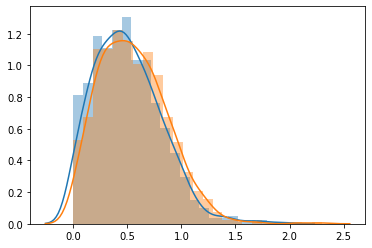

In [29]:
sns.distplot(dict_31_ppg)
sns.distplot(dict_30_ppg)

In [39]:
import numpy as np

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.average(x) - np.average(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

In [41]:
cohen_d(dict_30_ppg, dict_31_ppg)

0.1639942746802788

In [42]:
cohen_d(bootstrap_means_after, bootstrap_means_before)

-11.276838224470426

In [43]:
cohen_d(listofgoalgpgBefore, listofgoalgpgAfter)


0.28737943313414793

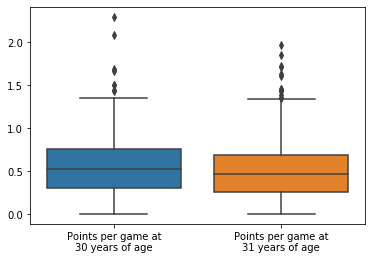

In [54]:
sns.boxplot( x=['Points per game at\n30 years of age', 'Points per game at\n31 years of age'], y=[dict_30_ppg, dict_31_ppg])